In [1]:
import os
import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import plot_model
from keras.models import load_model
from keras import regularizers
from keras.losses import mse 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


*Let's prepare out input data first. We will normalize all the values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.*

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# normalizing the values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Converting to 1D Array (Vector respresentation)
x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))
x_test = x_test.reshape(-1, np.prod(x_test.shape[1:]))

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Our Images have 784 features.

##### Architecture of Deep Autoencoder which is reducing the dimension from 784 to 2.

In [11]:
encoding_dim = 2
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(128, activation = 'relu')(input_img)
encoded = layers.Dense(64, activation ='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)

#encoder
encoder = keras.Model(input_img, encoded)

encoding_input = keras.Input(shape=(encoding_dim,))

decoded = layers.Dense(64, activation ='relu')(encoded)
decoded = layers.Dense(128, activation ='relu')(decoded)
decoded = layers.Dense(784, activation ='sigmoid')(decoded)



DeepAutoEncoder = keras.Model(input_img, decoded)
DeepAutoEncoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

#decoder
decoder_layer1 = DeepAutoEncoder.layers[-3]
decoder_layer2 = DeepAutoEncoder.layers[-2]
decoder_layer3 = DeepAutoEncoder.layers[-1]

decoder = keras.Model(encoding_input, 
                      decoder_layer3(decoder_layer2(decoder_layer1(encoding_input))))

# if 'deepAutoEncoder.h5' in os.listdir('./models'):
#     DeepAutoEncoder = load_model('deepAutoEncoder.h5')
#     encoder = load_model('deepEncoder.h5')
#     decoder = load_model('deepDecoder.h5')
# else:
DeepAutoEncoder.fit(x_train,x_train,
                    epochs = 50,
                    batch_size = 256,
                    shuffle = True,
                    validation_data = (x_test,x_test))
DeepAutoEncoder.save('./models/deepAutoEncoder.h5')
encoder.save('./models/deepEncoder.h5')
decoder.save('./models/deepDecoder.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0747 - val_loss: 0.0581
Epoch 2/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0554 - val_loss: 0.0527
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0512 - val_loss: 0.0495
Epoch 4/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0482 - val_loss: 0.0469
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0462 - val_loss: 0.0455
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0450 - val_loss: 0.0445
Epoch 7/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0441 - val_loss: 0.0438
Epoch 8/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0434 - val_loss: 0.0434
Epoch 9/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0429 - val_loss: 0.0428
Epoch

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#### Visualizing the latent space

<IPython.core.display.Javascript object>


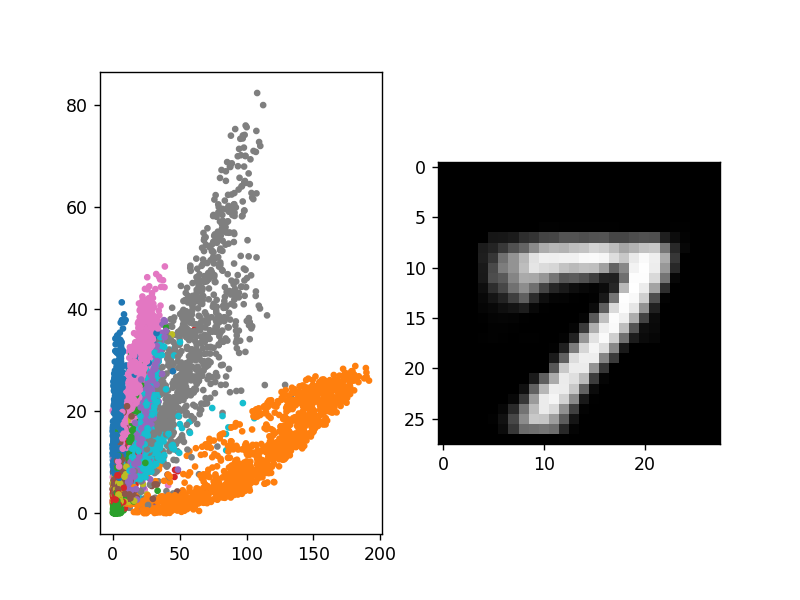

In [16]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(x=encoded_imgs[:,0],y=encoded_imgs[:,1], c = y_test, s =8, cmap='tab10')

def onclick(event):
#     global flag
    ix, iy = event.xdata, event.ydata
    latent_vector = np.array([[ix, iy]])
    
    decoded_img = decoder.predict(latent_vector)
    decoded_img = decoded_img.reshape(28, 28)
    ax[1].imshow(decoded_img, cmap='gray')
    plt.draw()

# motion_notify_event
cid = fig.canvas.mpl_connect('motion_notify_event', onclick)
plt.show()